# Prophet 

In [1]:
import pandas as pd, numpy as np

#### Read and Visualize data

In [2]:
df= pd.read_csv("E:/Python WD/time_series/data/Work Data - Sheet1.csv")

In [3]:
df

,obs,EEA,UYCD,FNNF,FYPTY,JGDPMTPR,UFCORPTS,UFSNPEPS,YPPROPADJNF,ZB,FTCORTCS
0,1990Q1,109.425333,515.394,5357.649418,73548.376,0.635775,21.4200,5.54000,311.134,385.623,178.90975
1,1990Q2,109.794667,498.407,5378.345388,75056.756,0.639104,22.1110,6.07000,318.417,404.009,335.53861
2,1990Q3,109.653667,493.570,5372.361529,76192.352,0.640903,22.9780,5.33000,327.154,413.339,97.43381
3,1990Q4,109.249000,480.947,5346.658270,76231.608,0.640087,23.4360,4.40000,327.283,413.234,180.60036
4,1991Q1,108.789000,471.691,5292.627808,75830.324,0.646631,23.7840,5.14000,321.286,423.450,140.44205
...,...,...,...,...,...,...,...,...,...,...,...
155,2028Q4,159.094300,2054.417,10107.340000,464095.400,1.292783,112.8616,44.65242,1844.229,3475.629,NaN
156,2029Q1,159.297100,2071.090,10139.980000,469126.600,1.297833,113.8027,51.43070,1856.459,3503.065,NaN
157,2029Q2,159.497000,2088.507,10172.360000,474237.900,1.302820,114.8291,49.83245,1871.764,3534.452,NaN
158,2029Q3,159.688200,2106.479,10203.990000,479138.900,1.307743,115.9413,49.12721,1887.274,3566.919,NaN


#### Preparing data for time series analysis

In [4]:
#define columns
df.columns
time_series_index= 'obs'
forecast_variable= 'FTCORTCS'
additional_variables= ['EEA', 'UYCD', 'FNNF', 'FYPTY', 'JGDPMTPR', 'UFCORPTS',
       'UFSNPEPS', 'YPPROPADJNF', 'ZB']

frequency= 'QS'
train_test_split= .2
forecast_points= 12

In [6]:
#converting time series index datatype to datetime

In [7]:
df['obs']= pd.to_datetime(df['obs'])
df= df.set_index(time_series_index)

In [9]:
#aggregate data if aggregation is required

In [10]:
#df= df.groupby(time_series_index).agg({forecast_variable:'sum'}).reset_index()

#### Resample data to quarterly level

In [22]:
df= df.resample('Q').sum()


In [23]:
#filter data from 2009 onwards
#df= df['2009-01-01':'2019-09-30']
df

,EEA,UYCD,FNNF,FYPTY,JGDPMTPR,UFCORPTS,UFSNPEPS,YPPROPADJNF,ZB,FTCORTCS
obs,,,,,,,,,,
1990-03-31,109.425333,515.394,5357.649418,73548.376,0.635775,21.4200,5.54000,311.134,385.623,178.90975
1990-06-30,109.794667,498.407,5378.345388,75056.756,0.639104,22.1110,6.07000,318.417,404.009,335.53861
1990-09-30,109.653667,493.570,5372.361529,76192.352,0.640903,22.9780,5.33000,327.154,413.339,97.43381
1990-12-31,109.249000,480.947,5346.658270,76231.608,0.640087,23.4360,4.40000,327.283,413.234,180.60036
1991-03-31,108.789000,471.691,5292.627808,75830.324,0.646631,23.7840,5.14000,321.286,423.450,140.44205
...,...,...,...,...,...,...,...,...,...,...
2028-12-31,159.094300,2054.417,10107.340000,464095.400,1.292783,112.8616,44.65242,1844.229,3475.629,0.00000
2029-03-31,159.297100,2071.090,10139.980000,469126.600,1.297833,113.8027,51.43070,1856.459,3503.065,0.00000
2029-06-30,159.497000,2088.507,10172.360000,474237.900,1.302820,114.8291,49.83245,1871.764,3534.452,0.00000


#### Visualize the data

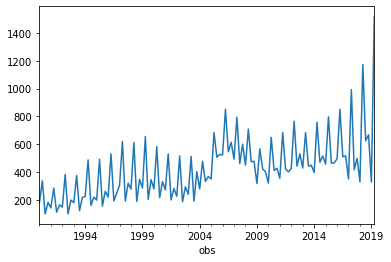

In [24]:
df[df.index<'2019-09-30'][forecast_variable].plot()

Smoothen the time series

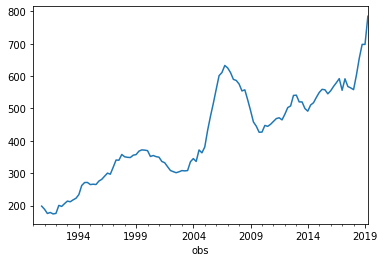

In [25]:
df[df.index<'2019-09-30'][forecast_variable].rolling(4).mean().plot()

Smoothen it further with one year rolling average

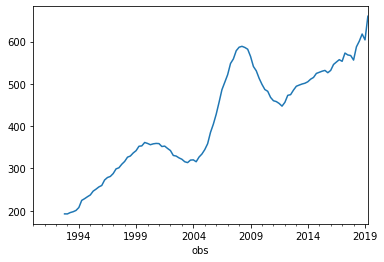

In [26]:
df[df.index<'2019-09-30'][forecast_variable].rolling(12).mean().plot()

#### Inference
An upward trend exists year on year

#### Inference:
Data is normally distributed

In [44]:
df= df.reset_index()
df= df.rename(columns={time_series_index:'ds',forecast_variable:'y'})
test_df= df[df.ds<='2019-09-30'][-8:]
train_df= df[df.ds<='2019-09-30'][:-8]
train_df

,ds,EEA,UYCD,FNNF,FYPTY,JGDPMTPR,UFCORPTS,UFSNPEPS,YPPROPADJNF,ZB,y
0,1990-01-01,109.425333,515.394,5357.649418,73548.376,0.635775,21.420,5.54,311.134,385.623,178.909750
1,1990-04-01,109.794667,498.407,5378.345388,75056.756,0.639104,22.111,6.07,318.417,404.009,335.538610
2,1990-07-01,109.653667,493.570,5372.361529,76192.352,0.640903,22.978,5.33,327.154,413.339,97.433810
3,1990-10-01,109.249000,480.947,5346.658270,76231.608,0.640087,23.436,4.40,327.283,413.234,180.600360
4,1991-01-01,108.789000,471.691,5292.627808,75830.324,0.646631,23.784,5.14,321.286,423.450,140.442050
...,...,...,...,...,...,...,...,...,...,...,...
106,2016-07-01,144.705000,1364.932,8428.026205,250023.932,1.072532,53.352,25.39,1393.004,2119.315,510.095859
107,2016-10-01,145.243000,1372.366,8475.419536,254644.816,1.080079,54.516,24.16,1408.870,2156.275,514.791052
108,2017-01-01,145.831333,1385.129,8528.375000,264573.300,1.087938,54.604,27.46,1450.270,2187.915,349.355516
109,2017-04-01,146.337667,1398.699,8566.950000,270307.100,1.096833,53.277,27.01,1470.141,2168.901,992.113059


In [45]:
#install fbprophet library by uncommenting this
#!conda install libpython m2w64-toolchain -c msys2
#!pip install pystan
#!pip install fbprophet

from fbprophet import Prophet
model=Prophet(yearly_seasonality=True,weekly_seasonality=True)

#### Adding multiple regressors

In [46]:
for regressor in additional_variables:
    model.add_regressor(regressor)

#### Fit the model

In [47]:
model.fit(train_df)
#forecast = model.make_future_dataframe(periods= forecast_points, include_history=True, freq= frequency)
#forecast = model.predict(df[df.ds>'2019-09-30'].drop(columns=['y']))
forecast = model.predict(test_df.drop(columns=['y']))

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
actual_predicted_df= df[df.ds<='2019-09-30'][['ds','y']]
actual_predicted_df= pd.merge(actual_predicted_df,forecast[['ds','yhat']], on= 'ds', how='outer')
actual_predicted_df= actual_predicted_df.rename(columns= {'y':'actual','yhat':'predicted'})
actual_predicted_df_wide= actual_predicted_df.melt(id_vars=['ds'], value_vars=['actual','predicted'], var_name='actual/predicted', value_name='value' )


#### Plotting actual vs predicted`

<AxesSubplot:xlabel='ds', ylabel='value'>

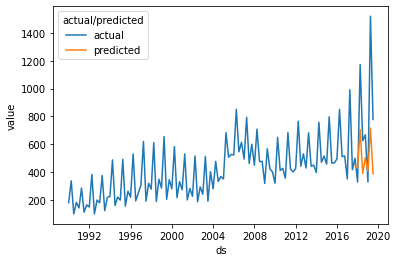

In [55]:
import seaborn as sns
sns.lineplot(x='ds', y= 'value',hue= 'actual/predicted', data= actual_predicted_df_wide)

<AxesSubplot:xlabel='ds', ylabel='value'>

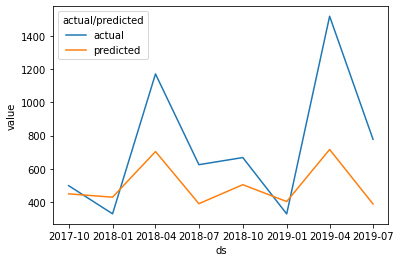

In [56]:
sns.lineplot(x='ds', y= 'value',hue= 'actual/predicted', data= actual_predicted_df_wide[actual_predicted_df_wide.ds>='2017Q4'])

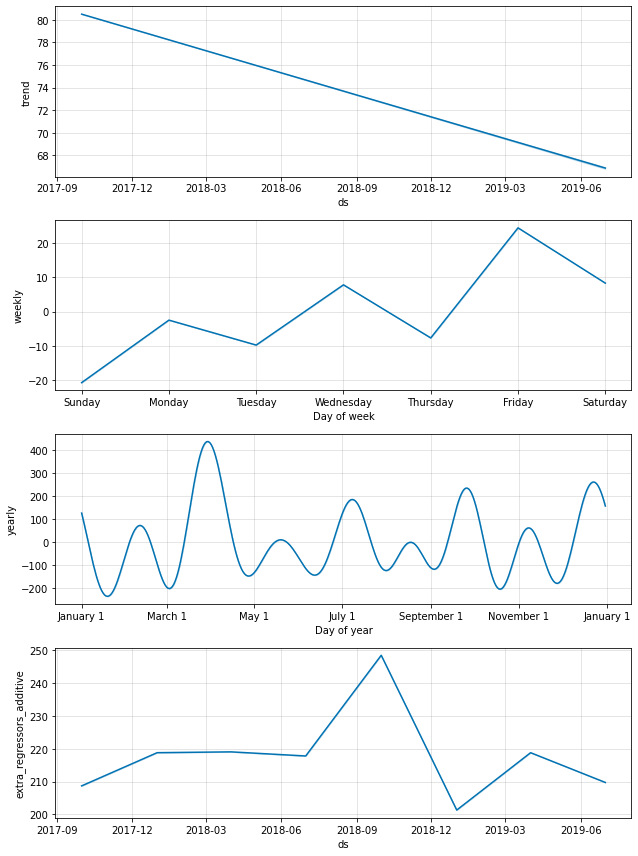

In [57]:
# Python
fig2 = model.plot_components(forecast)

,ds,yhat,yhat_lower,yhat_upper
36,2028-12-31,812.025416,752.233099,872.537749
37,2029-03-31,736.074824,671.163637,793.889887
38,2029-06-30,1041.444013,982.726527,1104.602937
39,2029-09-30,754.544886,694.955677,811.361143
40,2029-12-31,839.184900,777.772087,899.194764


In [36]:
#### Computing performance

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import math
print('mean absolute error')
ans= mean_absolute_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted)
print(ans)
print('mean squared error')
math.sqrt(mean_squared_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted))

mean absolute error
276.4915770777535
mean squared error


366.1723306417995

#### Computing performance

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from numpy import math
metrics= pd.read_csv('E:/Python WD/time_series/data/metrics.csv', index_col='Unnamed: 0')
metrics.loc['mean absolute error', 'Prophet']= mean_absolute_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted)
metrics.loc['mean squared error', 'Prophet']= math.sqrt(mean_squared_error(actual_predicted_df[-8:].actual, actual_predicted_df[-8:].predicted))
metrics.to_csv('E:/Python WD/time_series/data/metrics.csv')
metrics

,ARIMA,holt winters,VARMAX,Prophet
mean squared error,259.930480,264.855497,422.910120,366.172331
mean absolute error,205.418661,202.861790,317.798054,276.491577


#### Predicting next 10 years data

In [69]:

forecast = model.predict(df[df.ds>'2019-09-30'])
forecasts= pd.DataFrame(forecast['yhat'][0:40])



forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



#storing into a csv file
predictions= pd.read_csv('E:/Python WD/time_series/data/predictions.csv', index_col= 'Unnamed: 0')
predictions.loc[:, 'Prophet']= forecasts.values
predictions
predictions.to_csv('E:/Python WD/time_series/data/predictions.csv')



NameError: name 'VARMAX' is not defined